# Hotel Bookings Analysis:

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Reading data:

In [224]:
data=pd.read_csv("./Data/input/Hotel Bookings.csv")
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3207,Resort Hotel,0,124,2015,November,47,21,0,1,2,...,No Deposit,241.0,NaN,0,Transient,54.05,0,1,Check-Out,2015-11-22
72471,City Hotel,1,31,2017,July,30,29,2,1,2,...,No Deposit,9.0,NaN,0,Transient,170.00,0,1,Canceled,2017-06-28
63116,City Hotel,1,56,2017,February,5,1,0,3,2,...,Non Refund,29.0,NaN,0,Transient,60.00,0,0,Canceled,2016-12-07
94406,City Hotel,0,67,2016,August,32,1,1,2,3,...,No Deposit,14.0,NaN,0,Transient,222.30,0,0,Check-Out,2016-08-04
88749,City Hotel,0,76,2016,May,20,8,2,2,2,...,No Deposit,85.0,NaN,0,Transient,90.95,0,1,Check-Out,2016-05-12


## Data Cleaning:

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [226]:
data.shape

(119390, 32)

In [227]:
df= data.copy()

### 1. Check for missing values and find the best practice to deal with them 

In [228]:
df.iloc[:,0:16].isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       4
babies                         0
meal                           0
country                      488
market_segment                 0
distribution_channel           0
dtype: int64

In [229]:
df.iloc[:,15:32].isnull().sum()

distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
dtype: int64

In [230]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [231]:
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [232]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [233]:
df['country'].isnull().sum()

488

In [234]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [235]:
df['children'].isnull().sum()

4

In [236]:
df['company'] = df['company'].replace(np.nan, -1)
df['agent'] = df['agent'].replace(np.nan, -1)
df = df.dropna(subset='country')
df = df.dropna(subset='children')

In [237]:
df.iloc[:,0:16].isnull().sum()

hotel                        0
is_canceled                  0
lead_time                    0
arrival_date_year            0
arrival_date_month           0
arrival_date_week_number     0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
children                     0
babies                       0
meal                         0
country                      0
market_segment               0
distribution_channel         0
dtype: int64

In [238]:
df.iloc[:,15:32].isnull().sum()

distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

### 2. Convert the dtypes to appropriate ones according to the values 

In [239]:
df.iloc[:,0:16].info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      118898 non-null  object 
 1   is_canceled                118898 non-null  int64  
 2   lead_time                  118898 non-null  int64  
 3   arrival_date_year          118898 non-null  int64  
 4   arrival_date_month         118898 non-null  object 
 5   arrival_date_week_number   118898 non-null  int64  
 6   arrival_date_day_of_month  118898 non-null  int64  
 7   stays_in_weekend_nights    118898 non-null  int64  
 8   stays_in_week_nights       118898 non-null  int64  
 9   adults                     118898 non-null  int64  
 10  children                   118898 non-null  float64
 11  babies                     118898 non-null  int64  
 12  meal                       118898 non-null  object 
 13  country                    118898 

In [240]:
df.iloc[:,15:32].info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distribution_channel            118898 non-null  object 
 1   is_repeated_guest               118898 non-null  int64  
 2   previous_cancellations          118898 non-null  int64  
 3   previous_bookings_not_canceled  118898 non-null  int64  
 4   reserved_room_type              118898 non-null  object 
 5   assigned_room_type              118898 non-null  object 
 6   booking_changes                 118898 non-null  int64  
 7   deposit_type                    118898 non-null  object 
 8   agent                           118898 non-null  float64
 9   company                         118898 non-null  float64
 10  days_in_waiting_list            118898 non-null  int64  
 11  customer_type                   118898 non-null  object 
 12  adr                  

In [241]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [242]:
df['is_canceled'].unique()

array([0, 1], dtype=int64)

In [243]:
df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99,  95,  96,  69,  45,
        40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,  76,
         3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81, 368,
       364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,  86,
        52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,  34,
        27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,  67,
        55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,  22,
        91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58, 116,
        42, 321,  38, 118,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [244]:
print('Max:',df['lead_time'].max())
print("Min:",df['lead_time'].min())

Max: 737
Min: 0


In [245]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [246]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [247]:
print(df['arrival_date_week_number'].unique())
print('Max:',df['arrival_date_week_number'].max())
print('Min:',df['arrival_date_week_number'].min())

[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]
Max: 53
Min: 1


In [248]:
print(df['arrival_date_day_of_month'].unique())
print('Max:',df['arrival_date_day_of_month'].max())
print('Min:',df['arrival_date_day_of_month'].min())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Max: 31
Min: 1


In [249]:
print(df['stays_in_weekend_nights'].unique())
print('Max:',df['stays_in_weekend_nights'].max())
print('Min:',df['stays_in_weekend_nights'].min())

[ 0  1  2  4  3  6 13  8  5  7 12  9 16 10 14]
Max: 16
Min: 0


In [250]:
print(df['stays_in_week_nights'].unique())
print('Max:',df['stays_in_week_nights'].max())
print('Min:',df['stays_in_week_nights'].min())

[ 0  1  2  3  4  5 11  8 10  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 25 17 32 26 18 34 35 41]
Max: 41
Min: 0


In [251]:
print(df['adults'].unique())
print('Max:',df['adults'].max())
print('Min:',df['adults'].min())

[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
Max: 55
Min: 0


In [252]:
print(df['children'].unique())
print('Max:',df['children'].max())
print('Min:',df['children'].min())

[ 0.  1.  2. 10.  3.]
Max: 10.0
Min: 0.0


In [253]:
print(df['babies'].unique())
print('Max:',df['babies'].max())
print('Min:',df['babies'].min())

[ 0  1  2 10  9]
Max: 10
Min: 0


In [254]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [255]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [256]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [257]:
print(df['is_repeated_guest'].unique())

[0 1]


In [258]:
print(df['previous_cancellations'].unique())
print('Max:',df['previous_cancellations'].max())
print('Min:',df['previous_cancellations'].min())

[ 0  1  2  3 26 25 14  4 24 19  5 21  6 13 11]
Max: 26
Min: 0


In [259]:
print(df['previous_bookings_not_canceled'].unique())
print('Max:',df['previous_bookings_not_canceled'].max())
print('Min:',df['previous_bookings_not_canceled'].min())

[ 0  1  2  3  5  4  6  7  8  9 10 11 12 13 14 15 21 24 25 27 28 30 16 17
 18 19 20 22 23 26 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
Max: 72
Min: 0


In [260]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B', 'P'], dtype=object)

In [261]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K', 'P'],
      dtype=object)

In [262]:
print(df['booking_changes'].unique())
print('Max:',df['booking_changes'].max())
print('Min:',df['booking_changes'].min())

[ 3  4  0  1  2  5 17  6  8  7 10 16  9 13 12 20 14 15 11 21 18]
Max: 21
Min: 0


In [263]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [264]:
print(df['agent'].unique())
print('Max:',df['agent'].max())
print('Min:',df['agent'].min())

[ -1. 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
  34. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195. 352. 355. 159.
 139. 363. 384. 360. 331. 367.  64.  78. 406. 163. 414. 333. 427. 431.
 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.  59.
 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508. 535.
 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.  42.  20.  19.  45.
  37. 

In [265]:
print(df['company'].unique())
print('Max:',df['company'].max())
print('Min:',df['company'].min())

[ -1. 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.  83.
 416.  51. 395. 102.  34.  84. 360. 394. 382. 461. 478. 112. 486. 421.
   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203. 263. 477. 521.
 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355. 254. 543. 531.
 528. 120.  81. 116. 530. 103.  62.  39.  16.  61.  92. 501. 291. 290.
 192.  43. 465. 287. 297. 207. 437. 165. 329. 272.  28.  77. 482. 200.
  42. 338. 108.  72. 246. 319. 146. 159. 380. 323. 511. 407. 325. 278.
  80. 403. 399.  14. 137. 343. 346. 347. 349. 289. 351. 353.  54.  99.
 358. 361. 362. 366. 372. 365. 277. 109. 377. 379.  22. 378. 330. 364.
 401. 232. 255. 384. 167. 212. 514. 391. 400. 376. 402. 396. 302. 398.
 225.   6. 370. 369. 409. 168. 104. 408. 413. 148.  10. 333. 419. 415.
 424. 425. 423. 422. 435. 439. 442. 282. 448. 443. 454. 444.  52. 459.
 458. 

In [266]:
print(df['days_in_waiting_list'].unique())
print('Max:',df['days_in_waiting_list'].max())
print('Min:',df['days_in_waiting_list'].min())

[  0  50  47  65 122  75 101 150 125  14  60  34 100  22 121  61  39   5
   1   8 107  43  52   2  11 142 116  13  44  97  83   4 113  18  20 185
  93 109   6  37 105 154  64  99  38  48  33  77  21  80  59  40  58  89
  53  49  69  87  91  57 111  79  98  85  63  15   3  41 224  31  56 187
 176  71  55  96 236 259 207 215 160 120  30  32  27  62  24 108 147 379
  70  35 178 330 223 174 162 391  68 193  10  76  16  28   9 165  17  25
  46   7  84 175 183  23 117  12  54  26  73  45  19  42  72  81  92  74
 167  36]
Max: 391
Min: 0


In [267]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [268]:
print(df['adr'].unique())
print('Max:',df['adr'].max())
print('Min:',df['adr'].min())

[  0.    75.    98.   ... 266.75 209.25 157.71]
Max: 5400.0
Min: -6.38


In [269]:
adr_tail= df['adr'].sort_values().head(10)
adr_tail

14969   -6.38
2242     0.00
76651    0.00
76644    0.00
76643    0.00
76642    0.00
28201    0.00
76641    0.00
2240     0.00
0        0.00
Name: adr, dtype: float64

In [270]:
print(df['required_car_parking_spaces'].unique())
print('Max:',df['required_car_parking_spaces'].max())
print('Min:',df['required_car_parking_spaces'].min())

[0 1 2 8 3]
Max: 8
Min: 0


In [271]:
print(df['total_of_special_requests'].unique())
print('Max:',df['total_of_special_requests'].max())
print('Min:',df['total_of_special_requests'].min())

[0 1 3 2 4 5]
Max: 5
Min: 0


In [272]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [273]:
df['reservation_status_date'].unique()

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-16',
       '2015-05-29', '2015-05-19', '2015-06-19', '2015-05-23',
       '2015-05-18', '2015-07-09', '2015-06-02', '2015-07-13',
       '2015-07-04', '2015-06-29', '2015-06-16', '2015-06-18',
       '2015-06-12', '2015-06-09', '2015-05-26', '2015-07-11',
       '2015-07-12', '2015-07-17', '2015-04-15', '2015-05-13',
       '2015-07-10', '2015-05-20', '2015-05-12', '2015-07-14',
       '2015-06-17', '2015-05-01', '2015-03-30', '2015-07-15',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

In [274]:
df["hotel"] = df["hotel"].astype("category")
df["is_canceled"] = df["is_canceled"].astype("uint8")
df["lead_time"] = df["lead_time"].astype("uint16")
df["arrival_date_year"] = df["arrival_date_year"].astype("uint16")
df["arrival_date_month"] = df["arrival_date_month"].astype("category")
df["arrival_date_week_number"] = df["arrival_date_week_number"].astype("uint8")
df["arrival_date_day_of_month"] = df["arrival_date_day_of_month"].astype("uint8")
df["stays_in_weekend_nights"] = df["stays_in_weekend_nights"].astype("uint8")
df["stays_in_week_nights"] = df["stays_in_week_nights"].astype("uint8")
df["adults"] = df["adults"].astype("uint8")
df["children"] = df["children"].astype("uint8")
df["babies"] = df["babies"].astype("uint8")
df["meal"] = df["meal"].astype("category")
df["market_segment"] = df["market_segment"].astype("category")
df["distribution_channel"] = df["distribution_channel"].astype("category")
df["is_repeated_guest"] = df["is_repeated_guest"].astype("uint8")
df["previous_cancellations"] = df["previous_cancellations"].astype("uint8")
df["previous_bookings_not_canceled"] = df["previous_bookings_not_canceled"].astype("uint8")
df["reserved_room_type"] = df["reserved_room_type"].astype("category")
df["assigned_room_type"] = df["assigned_room_type"].astype("category")
df["booking_changes"] = df["booking_changes"].astype("uint8")
df["deposit_type"] = df["deposit_type"].astype("category")
df["agent"] = df["agent"].astype("int16")
df["company"] = df["company"].astype("int16")
df["days_in_waiting_list"] = df["days_in_waiting_list"].astype("uint16")
df["customer_type"] = df["customer_type"].astype("category")
df["adr"] = df["adr"].astype("float64")
df["required_car_parking_spaces"] = df["required_car_parking_spaces"].astype("uint8")
df["total_of_special_requests"] = df["total_of_special_requests"].astype("uint8")
df["reservation_status"] = df["reservation_status"].astype("category")
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [275]:
df.iloc[:,0:16].info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   hotel                      118898 non-null  category
 1   is_canceled                118898 non-null  uint8   
 2   lead_time                  118898 non-null  uint16  
 3   arrival_date_year          118898 non-null  uint16  
 4   arrival_date_month         118898 non-null  category
 5   arrival_date_week_number   118898 non-null  uint8   
 6   arrival_date_day_of_month  118898 non-null  uint8   
 7   stays_in_weekend_nights    118898 non-null  uint8   
 8   stays_in_week_nights       118898 non-null  uint8   
 9   adults                     118898 non-null  uint8   
 10  children                   118898 non-null  uint8   
 11  babies                     118898 non-null  uint8   
 12  meal                       118898 non-null  category
 13  country            

In [276]:
df.iloc[:,15:32].info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   distribution_channel            118898 non-null  category      
 1   is_repeated_guest               118898 non-null  uint8         
 2   previous_cancellations          118898 non-null  uint8         
 3   previous_bookings_not_canceled  118898 non-null  uint8         
 4   reserved_room_type              118898 non-null  category      
 5   assigned_room_type              118898 non-null  category      
 6   booking_changes                 118898 non-null  uint8         
 7   deposit_type                    118898 non-null  category      
 8   agent                           118898 non-null  int16         
 9   company                         118898 non-null  int16         
 10  days_in_waiting_list            118898 non-null  uint16      

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  category      
 1   is_canceled                     118898 non-null  uint8         
 2   lead_time                       118898 non-null  uint16        
 3   arrival_date_year               118898 non-null  uint16        
 4   arrival_date_month              118898 non-null  category      
 5   arrival_date_week_number        118898 non-null  uint8         
 6   arrival_date_day_of_month       118898 non-null  uint8         
 7   stays_in_weekend_nights         118898 non-null  uint8         
 8   stays_in_week_nights            118898 non-null  uint8         
 9   adults                          118898 non-null  uint8         
 10  children                        118898 non-null  uint8       

### 3. Check for the duplicate values and remove them from data 

In [278]:
df.duplicated().sum()

31958

In [279]:
df = df.drop_duplicates()

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86940 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86940 non-null  category      
 1   is_canceled                     86940 non-null  uint8         
 2   lead_time                       86940 non-null  uint16        
 3   arrival_date_year               86940 non-null  uint16        
 4   arrival_date_month              86940 non-null  category      
 5   arrival_date_week_number        86940 non-null  uint8         
 6   arrival_date_day_of_month       86940 non-null  uint8         
 7   stays_in_weekend_nights         86940 non-null  uint8         
 8   stays_in_week_nights            86940 non-null  uint8         
 9   adults                          86940 non-null  uint8         
 10  children                        86940 non-null  uint8         
 11  babies

### 4. According to the columns and their meanings, do any other preprocessings necessary for further analysis.

In [281]:
month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['arrival_date_month'] = df['arrival_date_month'].map(month_dict)

df['arrival_datetime'] = pd.to_datetime({
    'year': df['arrival_date_year'],
    'month': df['arrival_date_month'],
    'day': df['arrival_date_day_of_month']})

df["arrival_date_month"] = df["arrival_date_month"].astype("uint8")

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86940 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86940 non-null  category      
 1   is_canceled                     86940 non-null  uint8         
 2   lead_time                       86940 non-null  uint16        
 3   arrival_date_year               86940 non-null  uint16        
 4   arrival_date_month              86940 non-null  uint8         
 5   arrival_date_week_number        86940 non-null  uint8         
 6   arrival_date_day_of_month       86940 non-null  uint8         
 7   stays_in_weekend_nights         86940 non-null  uint8         
 8   stays_in_week_nights            86940 non-null  uint8         
 9   adults                          86940 non-null  uint8         
 10  children                        86940 non-null  uint8         
 11  babies

In [283]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_datetime
87766,City Hotel,0,169,2016,4,17,22,2,2,1,...,2,-1,48,Transient-Party,63.50,0,0,Check-Out,2016-04-26,2016-04-22
86459,City Hotel,0,39,2016,3,14,31,0,3,3,...,9,-1,0,Transient,150.30,0,0,Check-Out,2016-04-03,2016-03-31
6584,Resort Hotel,1,175,2016,6,25,18,4,7,3,...,240,-1,0,Transient,145.00,0,0,Canceled,2016-01-11,2016-06-18
85215,City Hotel,0,56,2016,3,11,6,2,3,2,...,7,-1,0,Transient,62.32,0,1,Check-Out,2016-03-11,2016-03-06
90748,City Hotel,0,3,2016,6,24,10,0,1,1,...,187,-1,0,Transient-Party,120.00,0,0,Check-Out,2016-06-11,2016-06-10


## Analysis: 

### 1. There are two types of hotels in the dataset, which type of hotels booked most?

In [284]:
df["hotel"].unique()

['Resort Hotel', 'City Hotel']
Categories (2, object): ['City Hotel', 'Resort Hotel']

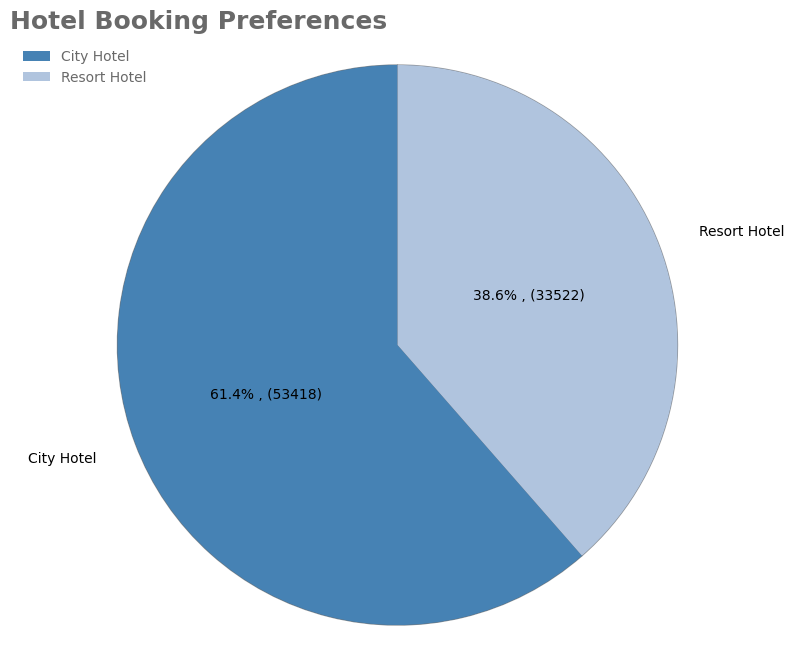

In [285]:
hotel_type_counts = df['hotel'].value_counts()
fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(hotel_type_counts, labels=hotel_type_counts.index,       
        colors=['#4682B4', '#B0C4DE'],
        shadow=True,
        autopct=lambda p:f'{p:1.1f}% , ({p*sum(hotel_type_counts)/100 :1.0f})' ,
        startangle=90,
        radius=200,
        pctdistance=0.5,
        labeldistance=1.15
        )

ax.axis('equal')

ax.set_title('Hotel Booking Preferences',
    weight="bold",
    color='#696969',
    fontsize=18,
    loc="left")

ax.legend(frameon=False,
          loc='upper left',
          labelcolor='#696969')

plt.show()

#### Hotel Booking Preferences

**Key Observations:**

"According to the diagram, ``City Hotel`` has captured over ``61%`` of the total reservations, indicating a substantial preference for it over Resort Hotel."

 ### 2.What percentage of bookings were cancelled?

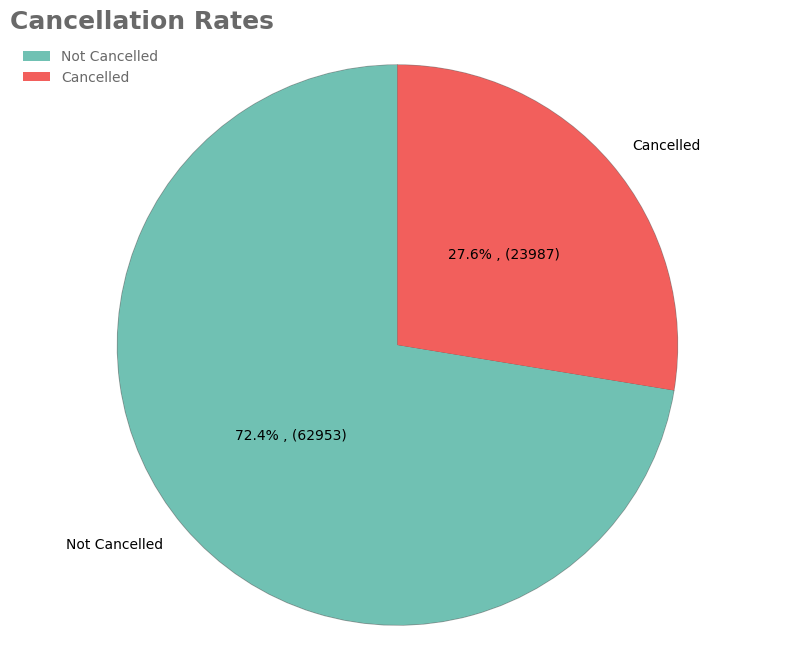

In [286]:
bookings_cancelled = df['is_canceled'].value_counts()
fig, ax = plt.subplots(figsize=(10, 8))

labels = ['Not Cancelled','Cancelled' ]
colors = ['#70c1b3', '#f25f5c']

ax.pie(bookings_cancelled, labels=labels,       
        colors=colors,
        shadow=True,
        autopct=lambda p:f'{p:1.1f}% , ({p*sum(bookings_cancelled)/100 :1.0f})' ,
        startangle=90,
        radius=200,
        pctdistance=0.5,
        labeldistance=1.1
        )

ax.axis('equal')

ax.set_title('Cancellation Rates',
    weight="bold",
    color='#696969',
    fontsize=18,
    loc="left")

ax.legend(frameon=False,
          loc='upper left',
          labelcolor='#696969')

plt.show()

#### Cancellation Rates

**Key Observations:**

"The chart reveals a cancellation rate of approximately ``27%`` for all reservations."

### 3. Based on different hotel types, what percentage of bookings were cancelled?

In [287]:
City_hotel= df[df["hotel"] == 'City Hotel']
hotel_is_canceled= City_hotel.groupby('is_canceled', as_index=False)['hotel'].count()
hotel_is_canceled['is_canceled'] = hotel_is_canceled['is_canceled'].map({1: 'Cancelled', 0: 'Not Cancelled'})
hotel_is_canceled

,is_canceled,hotel
0,Not Cancelled,37377
1,Cancelled,16041


In [288]:
Resort_Hotel_hotel= df[df["hotel"] == 'Resort Hotel']
hotel_is_canceled_02= Resort_Hotel_hotel.groupby('is_canceled', as_index=False)['hotel'].count()
hotel_is_canceled_02['is_canceled'] = hotel_is_canceled_02['is_canceled'].map({1: 'Cancelled', 0: 'Not Cancelled'})
hotel_is_canceled_02

,is_canceled,hotel
0,Not Cancelled,25576
1,Cancelled,7946


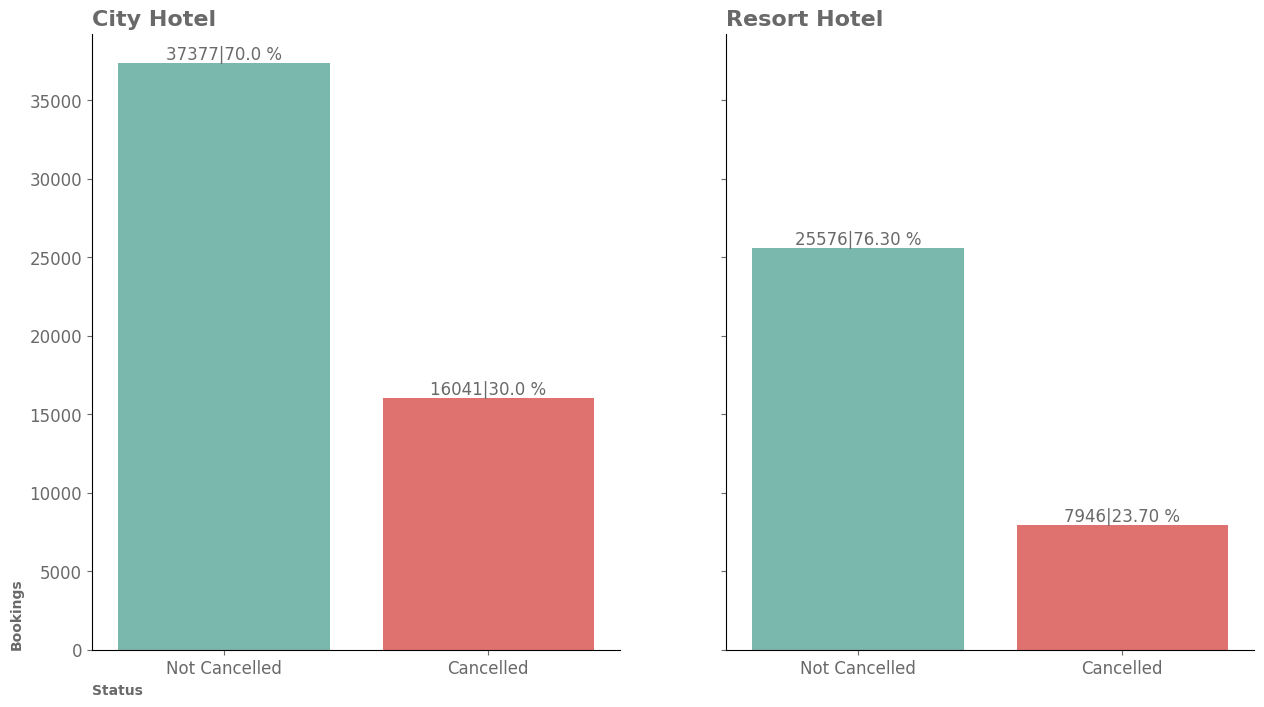

In [289]:
fig, axis = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

City_Hotel_plot = sns.barplot(data=hotel_is_canceled, x='is_canceled', y='hotel', ax=axis[0],
                              palette=['#70c1b3', '#f25f5c'], hue='is_canceled')

City_Hotel_plot.set_xlabel("Status", loc="left", weight="bold", fontsize=10, color="#696969")
City_Hotel_plot.set_ylabel('Bookings', loc="bottom", weight="bold", fontsize=10, color="#696969")
City_Hotel_plot.set_title('City Hotel', weight="bold", color='#696969', fontsize=16, loc="left")
City_Hotel_plot.spines[["right", "top"]].set_visible(False)

for i in City_Hotel_plot.containers:
    City_Hotel_plot.bar_label(i, fmt=lambda i: f'{i :1.0f}|{(i*100)/len(City_hotel):.1f} %', color='#696969', fontsize=12)

City_Hotel_plot.tick_params(axis="x", colors='#696969', labelsize="large")
City_Hotel_plot.tick_params(axis="y", colors='#696969', labelsize="large")

Resort_Hotel_plot = sns.barplot(data=hotel_is_canceled_02, x='is_canceled', y='hotel', ax=axis[1],
                                palette=['#70c1b3', '#f25f5c'], hue='is_canceled')

Resort_Hotel_plot.set_xlabel("")
Resort_Hotel_plot.set_ylabel("")
Resort_Hotel_plot.set_title('Resort Hotel', weight="bold", color='#696969', fontsize=16, loc="left")
Resort_Hotel_plot.spines[["right", "top"]].set_visible(False)

for i in Resort_Hotel_plot.containers:
    Resort_Hotel_plot.bar_label(i, fmt=lambda i: f'{i :1.0f}|{(i*100)/len(Resort_Hotel_hotel):.2f} %', color='#696969', fontsize=12)

Resort_Hotel_plot.tick_params(axis="x", colors='#696969', labelsize="large")
Resort_Hotel_plot.tick_params(axis="y", colors='#696969', labelsize="large")

plt.show()

#### Cancellation Rates by Hotel Type

**Key Observations:**


According to the diagram, approximately ``30%`` of reservations have been canceled at ``City_Hotel``,

while ``Resort_Hotel`` has experienced a cancellation rate of around ``23%``.

Consequently,``Resort_Hotel`` has a relatively better performance in terms of cancellations.


### 4. In different years, what type of hotels were booked most and booked least?

In [290]:
different_years= df['arrival_date_year'].unique()
different_years

array([2015, 2016, 2017], dtype=uint16)

In [291]:
different_years_hotel=df.groupby(['arrival_date_year',"hotel"],observed=False)\
    .agg({"hotel" : 'count'})
different_years_hotel

hotel
arrival_date_year hotel              
2015              City Hotel     6544
                  Resort Hotel   6656
2016              City Hotel    26756
                  Resort Hotel  15368
2017              City Hotel    20118
                  Resort Hotel  11498

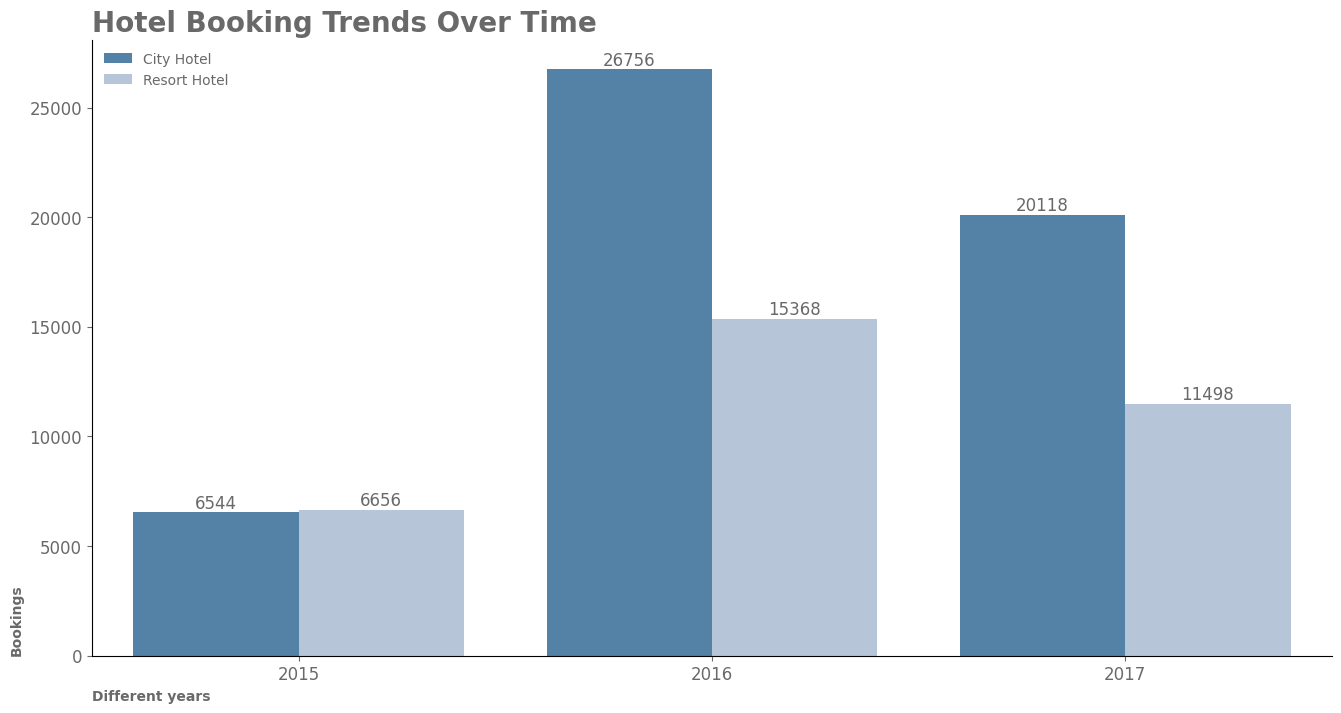

In [292]:
fig, ax = plt.subplots(figsize=(16, 8))
different_years_hotel_plt= sns.countplot(data=df, x='arrival_date_year', hue='hotel',
                                        palette=['#4682B4', '#B0C4DE'],legend='auto')

different_years_hotel_plt.set_xlabel("Different years",loc="left", weight="bold", fontsize=10, color="#696969")

different_years_hotel_plt.set_ylabel('Bookings',loc="bottom", weight="bold",fontsize=10 ,color="#696969")

different_years_hotel_plt.set_title('Hotel Booking Trends Over Time', weight="bold",color='#696969', fontsize=20,loc="left")

for i in different_years_hotel_plt.containers:
 different_years_hotel_plt.bar_label(i,fmt=lambda i: f'{i :1.0f}',color='#696969', fontsize=12)

different_years_hotel_plt.legend(frameon=False,loc='upper left',labelcolor='#696969')

different_years_hotel_plt.tick_params(axis="x", colors='#696969', labelsize="large")
different_years_hotel_plt.tick_params(axis="y", colors='#696969', labelsize="large")

sns.despine(right=True, top=True)
plt.show()

#### Hotel Booking Trends Over Time

**Key Observations:**

``In 2015:``
According to the diagram, ``Resort Hotel`` accounted for approximately ``50.42%`` of all reservations, while ``City Hotel`` accounted for about ``49.58%``.

``In 2016:``
``City Hotel`` captured approximately ``63%``of reservations, and ``Resort Hotel`` accounted for roughly ``37%``.

``In 2017:``
Similar to the previous year, ``City Hotel`` captured approximately ``63%`` of reservations, while ``Resort Hotel`` accounted for about ``37%``.

In ``2015``, ``Resort Hotel`` had a slightly higher percentage of reservations. However, in the following year, ``City Hotel`` significantly increased its market share.
Additionally, the total number of reservations experienced substantial growth in ``2016``.
Although the overall number of reservations decreased in the final year, ``City Hotel`` continued to maintain a higher percentage of bookings.

### 5. According to different hotel types, how ‘adr’ changes in different months?

In [293]:
City_hotel_05= df[df["hotel"] == 'City Hotel']
City_hotel_adr_month=City_hotel_05.groupby('arrival_date_month',as_index=False,observed=False)['adr'].median()
City_hotel_adr_month.sort_values('arrival_date_month')

,arrival_date_month,adr
0,1,81.00
1,2,85.00
2,3,89.00
3,4,110.67
4,5,126.00
5,6,120.00
6,7,115.60
7,8,121.50
8,9,116.10
9,10,105.30


In [294]:
Resort_Hotel_hotel_05= df[df["hotel"] == 'Resort Hotel']
Resort_Hotel_adr_month=Resort_Hotel_hotel_05.groupby('arrival_date_month',as_index=False,observed=False)['adr'].median()
Resort_Hotel_adr_month.sort_values('arrival_date_month')

,arrival_date_month,adr
0,1,46.32
1,2,49.00
2,3,55.50
3,4,75.00
4,5,75.00
5,6,107.10
6,7,153.75
7,8,189.00
8,9,91.00
9,10,59.00


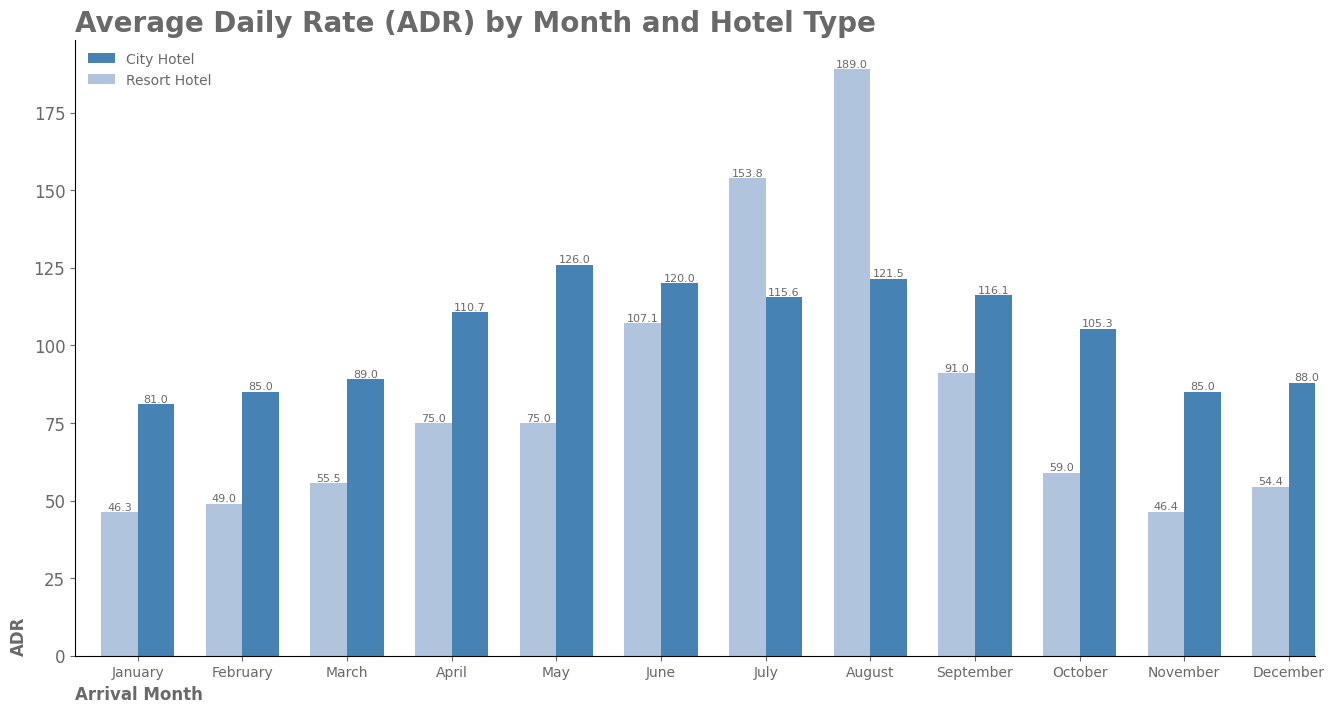

In [295]:
fig, ax = plt.subplots(figsize=(16,8))

bar_width = 0.35

City_hotel_adr_month.plot(kind='bar', x='arrival_date_month', y='adr', ax=ax, position=0, width=bar_width, color='#4682B4', label='City Hotel')

Resort_Hotel_adr_month.plot(kind='bar', x='arrival_date_month', y='adr', ax=ax, position=1, width=bar_width, color='#B0C4DE', label='Resort Hotel')

labels_01 =['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i in ax.containers:
 ax.bar_label(i,fmt=lambda i: f'{i :1.1f}',color='#696969', fontsize=8)

ax.spines[["right", "top"]].set_visible(False)

ax.tick_params(axis="x", colors='#696969', labelsize="large")
ax.tick_params(axis="y", colors='#696969', labelsize="large")

ax.set_xticks(range(0, 12), labels_01,rotation=0,fontsize=10)

ax.set_xlabel('Arrival Month',loc="left", weight="bold", fontsize=12, color="#696969")

ax.set_ylabel('ADR',loc="bottom", weight="bold",fontsize=12 ,color="#696969")

ax.set_title('Average Daily Rate (ADR) by Month and Hotel Type', weight="bold",color='#696969', fontsize=20,loc="left")

ax.legend(frameon=False,loc='upper left',labelcolor='#696969')

plt.show()

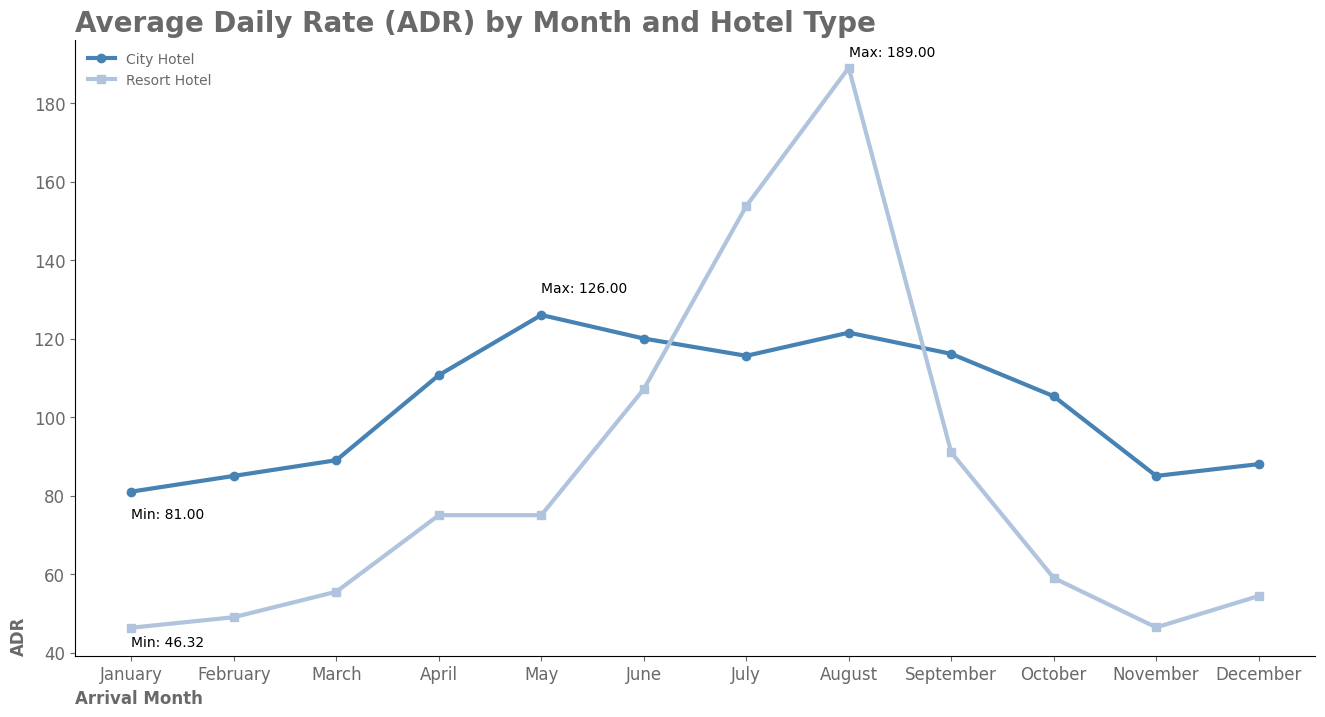

In [296]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(City_hotel_adr_month['arrival_date_month'], City_hotel_adr_month['adr'], marker='o', label='City Hotel', color='#4682B4',linewidth=3)
ax.plot(Resort_Hotel_adr_month['arrival_date_month'], Resort_Hotel_adr_month['adr'], marker='s', label='Resort Hotel', color='#B0C4DE',linewidth=3)

labels_01 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticks(range(1, 13), labels=labels_01)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="x", colors='#696969', labelsize="large")
ax.tick_params(axis="y", colors='#696969', labelsize="large")
ax.set_xlabel('Arrival Month', loc="left", weight="bold", fontsize=12, color="#696969")
ax.set_ylabel('ADR', loc="bottom", weight="bold", fontsize=12, color="#696969")
ax.set_title('Average Daily Rate (ADR) by Month and Hotel Type', weight="bold", color='#696969', fontsize=20, loc="left")

ax.legend(frameon=False, loc='upper left', labelcolor='#696969')

max_city_hotel_index = City_hotel_adr_month['adr'].idxmax()
min_city_hotel_index = City_hotel_adr_month['adr'].idxmin()
max_resort_hotel_index = Resort_Hotel_adr_month['adr'].idxmax()
min_resort_hotel_index = Resort_Hotel_adr_month['adr'].idxmin()

max_city_hotel_value = City_hotel_adr_month['adr'].max()
min_city_hotel_value = City_hotel_adr_month['adr'].min()
max_resort_hotel_value = Resort_Hotel_adr_month['adr'].max()
min_resort_hotel_value = Resort_Hotel_adr_month['adr'].min()

ax.annotate(f"Max: {max_city_hotel_value:.2f}", 
            xy=(max_city_hotel_index + 5, max_city_hotel_value), 
            xytext=(max_city_hotel_index + 1, max_city_hotel_value + 5), 
            ha='left', va='bottom')

ax.annotate(f"Min: {min_city_hotel_value:.2f}", 
            xy=(min_city_hotel_index + 1, min_city_hotel_value), 
            xytext=(min_city_hotel_index + 1, min_city_hotel_value - 4), 
            ha='left', va='top')

ax.annotate(f"Max: {max_resort_hotel_value:.2f}", 
            xy=(max_resort_hotel_index + 2, max_resort_hotel_value), 
            xytext=(max_resort_hotel_index + 1, max_resort_hotel_value + 2), 
            ha='left', va='bottom')

ax.annotate(f"Min: {min_resort_hotel_value:.2f}", 
            xy=(min_resort_hotel_index + 1, min_resort_hotel_value), 
            xytext=(min_resort_hotel_index + 1, min_resort_hotel_value -2), 
            ha='left', va='top')

plt.show()

#### Average Daily Rate (ADR) by Month and Hotel Type
**Key Observations:**

``City hotel:``
According to the diagram, the ``highest ADR`` (Average Daily Rate) is in ``May``, while the ``lowest`` is in ``January``.

``Resort Hotel``:
Based on the diagram, the ``highest`` ADR is in ``August``, and the ``lowest`` is in ``January``.

``Analysis:``
The diagram shows that the ``lowest ADR`` occurs during the ``colder months``, with ``anuary ``having the ``lowest rates``. However, as we move into ``spring and summer``, the ``rates increase``.
City hotel reaches its peak ADR in May, while Resort Hotel's highest rate is in August.
It appears that ``City hotel maintains relatively consistent rates during the warmer months``, whereas ``Resort Hotel experiences a more significant increase in rates during the summer``.

### 6. Check hotel wise daily rates mean, standard deviation, median, min and max.

In [297]:
q = df[(df.adr == 0) | (df.adr == -6.38)].index
df_q06 = df.drop(q, axis=0)
hotel_wise_daily_rates_02= df_q06.groupby(["hotel"],observed=False)\
    .agg({"adr" :  ['mean','std','median','min','max'] })
hotel_wise_daily_rates_02

adr                                 
                    mean        std  median   min     max
hotel                                                    
City Hotel    113.277520  45.809469  106.25  0.50  5400.0
Resort Hotel  101.611832  62.817228   81.00  0.26   508.0

#### Check hotel wise daily rates

hotel wise daily rates mean, standard deviation, median, min and max it's show in the tabel.

### 7. Extract the number of bookings per country and investigate that most of the guests are from which countries? 

In [298]:
different_contry= df.groupby(["country"],observed=False)\
    .agg({"country" :  'count' })\
        .rename({"country": "count_of_country"}, axis="columns")

different_contry= different_contry.sort_values("count_of_country",ascending=False)

different_contry_head_15= different_contry.head(15)
different_contry_head_15

,count_of_country
country,
PRT,27449
GBR,10433
FRA,8837
ESP,7252
DEU,5387
ITA,3066
IRL,3016
BEL,2081
BRA,1995


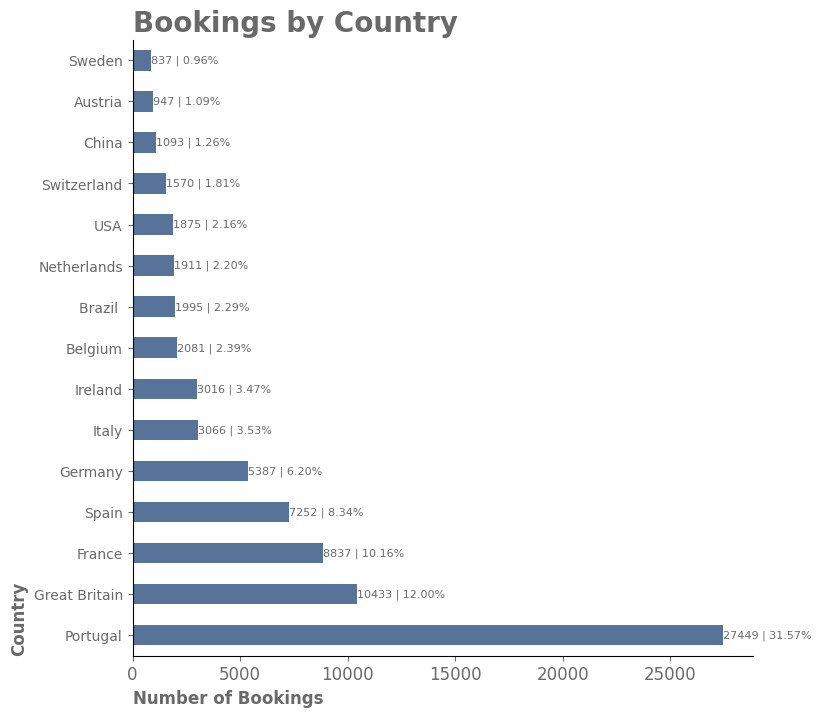

In [299]:
count_of_country= df["market_segment"].count()
fig, ax = plt.subplots(figsize=(8, 8))
different_contry_head_15_plt= different_contry_head_15.plot(kind='barh',ax=ax,  color='#577399',legend=False)

labels_07 =['Portugal', 'Great Britain', 'France', 'Spain', 'Germany', 'Italy',
             'Ireland', 'Belgium', 'Brazil ', 'Netherlands', 'USA', 'Switzerland','China','Austria','Sweden']

for i in ax.containers:
      ax.bar_label(i,fmt=lambda i: f'{i :1.0f} | {(i/count_of_country)*100 :1.2f}%',color='#696969', fontsize=8)

ax.spines[["right", "top"]].set_visible(False)

ax.tick_params(axis="x", colors='#696969', labelsize="large")
ax.tick_params(axis="y", colors='#696969', labelsize="large")

ax.set_yticks(range(0, 15), labels_07,rotation=0,fontsize=10)

ax.set_xlabel('Number of Bookings',loc="left", weight="bold", fontsize=12, color="#696969")

ax.set_ylabel('Country',loc="bottom", weight="bold",fontsize=12 ,color="#696969")

ax.set_title('Bookings by Country', weight="bold",color='#696969', fontsize=20,loc="left")

plt.show()

### Top Booking Countries

**Key Observations:**

``Most reservations`` were made by guests from ``Portugal, the United Kingdom, France, Spain, and Germany``, in that order.

Overall, the majority of bookings originated from ``European countries``.